In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb
 

In [2]:
#Data for Incidence rate 
final_combined_cancer_data = "Resource/final_combined_cancer_data.csv"
final_combined_cancer_data = pd.read_csv(final_combined_cancer_data)
final_combined_cancer_data.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,New Mexico,374.3,9116.0,144.0,3514.0
1,Arizona,387.0,30448.0,144.1,11508.0
2,Nevada,392.6,12409.0,162.3,4934.0
3,Wyoming,397.3,2638.0,144.7,943.0
4,Colorado,401.4,22701.0,138.9,7520.0


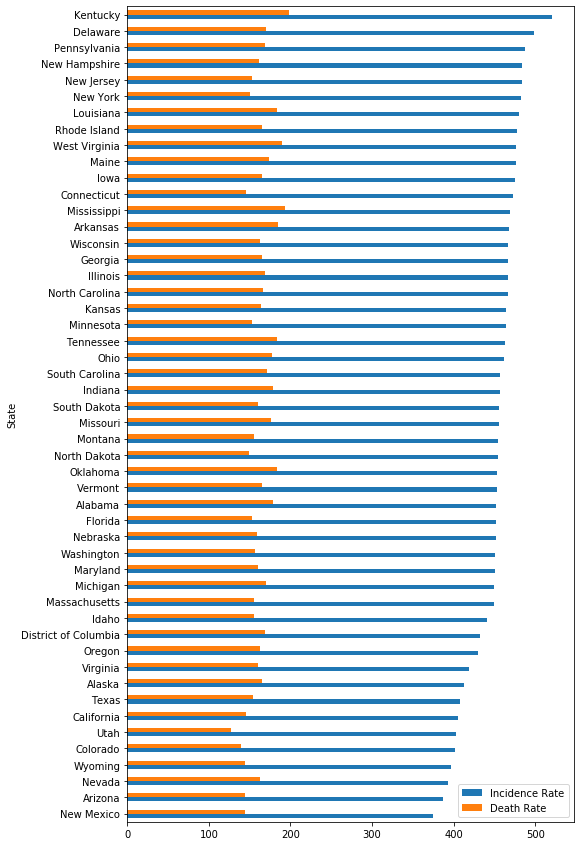

In [3]:
#Bar graph for Inceidence and Death Rate
bx = final_combined_cancer_data.set_index('State')
ax= bx[['Incidence Rate','Death Rate']].plot(kind="barh", figsize=(8,15))

In [4]:
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate'] 
quartiles_inc = Incidence_Rate.quantile([.25,.5,.75])
lowerq_inc = round(quartiles_inc[0.25],2)
upperq_inc = round(quartiles_inc[0.75],2)
iqr_inc = round(upperq_inc-lowerq_inc,2)

print(f"The lower quartile of Incidence Rate is:{lowerq_inc}")
print(f"The upper quartile of Incidence Rate is: {upperq_inc}")
print(f"The interquartile range of Incidence Rate is: {iqr_inc}")
print(f"The the median of Incidence Rate is: {quartiles_inc[0.5]} ")

lower_bound_inc = round(lowerq_inc - (1.5*iqr_inc),2)
upper_bound_inc = round(upperq_inc + (1.5*iqr_inc),2)
print(f"Values below {lower_bound_inc} could be outliers.")
print(f"Values above {upper_bound_inc} could be outliers.")

quartiles_dea = Death_Rate.quantile([.25,.5,.75])
lowerq_dea = round(quartiles_dea[0.25],2)
upperq_dea = round(quartiles_dea[0.75],2)
iqr_dea = round(upperq_dea-lowerq_dea,2)

print(f"The lower quartile of Death Rate is:{lowerq_dea}")
print(f"The upper quartile of Death Rate is: {upperq_dea}")
print(f"The interquartile range of Death Rate is: {iqr_dea}")
print(f"The the median of Death Rate is: {quartiles_dea[0.5]} ")

lower_bound_dea = round(lowerq_dea - (1.5*iqr_dea),2)
upper_bound_dea = round(upperq_dea + (1.5*iqr_dea),2)
print(f"Values below {lower_bound_dea} could be outliers.")
print(f"Values above {upper_bound_dea} could be outliers.")
print(Incidence_Rate < lower_bound_inc |(Incidence_Rate > upper_bound_inc)

SyntaxError: unexpected EOF while parsing (<ipython-input-4-78dc633e3e7c>, line 32)

In [ ]:
marker_outliers=dict(markerfacecolor='red',markersize=10) 
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate']  
plt.boxplot([Incidence_Rate, Death_Rate], labels=['Incidence Rate','Death Rate'], flierprops=marker_outliers)

plt.ylabel("Rate", size= 18)
plt.show()

In [ ]:
#Low Outliers for Incidence rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']<=404]
low_outliers

In [ ]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']>=506 ]
high_outliers

In [ ]:
#Low Outliers for Death rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']<=128 ]
low_outliers

In [ ]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']>=197 ]
high_outliers

In [ ]:
#Data for Death Rate 
Added_final_combined_cancer_data = "Resource/Added_final_combined_cancer_data.csv"
Added_final_combined_cancer_data = pd.read_csv(Added_final_combined_cancer_data)
Rounded_data = Added_final_combined_cancer_data
Rounded_data.head()


In [ ]:
# Bar graph for Cancer Death_per_hundred_Cancer_Patient Rankwise 
bx= Rounded_data.set_index('State')
cx= bx.sort_values("Cancer Death_per_hundred_cancer_patient")                                
 
ax= cx['Cancer Death_per_hundred_cancer_patient'].plot(kind="barh", figsize=(8,15))


In [ ]:
# Scatter plot, correlation, linear regression with Incidence Rate and Death Rate
Rounded_data.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [ ]:
#Correlation cofficient
pearsoncorr = Rounded_data.corr(method='pearson')
pearsoncorr

In [ ]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

In [ ]:
Incidence_gender_metadata = "Resource/New Cancer/USCS_by_Gender.csv" 
Incidence_gender_metadata = pd.read_csv(Incidence_gender_metadata)
Incidence_gender_metadata


In [ ]:

Incidence_data = ['420.9','488.8']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=187)
plt.title("Cancer Incidence Rate Genderwise")
plt.show()


In [ ]:
Death_gender_metadata = "Resource/Cancer death/USCS_by_gender.csv" 
Death_gender_metadata = pd.read_csv(Death_gender_metadata)
Death_gender_metadata

In [ ]:
Incidence_data = ['137.7','193.1']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=195)
plt.title("Cancer Death Rate Genderwise")
plt.show()

In [ ]:
highlow_cancer_inc_data = "Resource/heighest_lowest_Incidencerate_data.csv"
highlow_cancer_inc_data = pd.read_csv(highlow_cancer_inc_data)
highlow_cancer_inc_data = highlow_cancer_inc_data.set_index('State')
highlow_cancer_inc_data.head()

In [ ]:
pearsoncorr = highlow_cancer_inc_data.corr(method='pearson')
pearsoncorr

In [ ]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

In [ ]:
cx = highlow_cancer_inc_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both Incidence and Death rate is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [ ]:
highlow_cancer_death_data = "Resource/heighest_lowest_deathrate_data.csv"
highlow_cancer_death_data = pd.read_csv(highlow_cancer_death_data)
highlow_cancer_death_data = highlow_cancer_death_data.set_index('State')
highlow_cancer_death_data.head()

In [ ]:
pearsoncorr = highlow_cancer_death_data.corr(method='pearson')
pearsoncorr

In [ ]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

In [ ]:
cx = highlow_cancer_death_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [ ]:
#sam's part
#import air quality data and cancer data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
df=pd.read_csv("C:\\Users\\samantha.ettinger\\final_air_quality_data.csv")

In [ ]:
merge_table = pd.merge(df, final_combined_cancer_data, on="State")
merge_table

In [ ]:
#Sort data into top ten highest and bottom ten lowest death rates by state
cx= final_combined_cancer_data.sort_values("Death Rate")
cx.head(10)
cx.tail(10)
dx = pd.concat([cx.head(10),cx.tail(10)])
highest=cx.head(10)
lowest=cx.tail(10)
#create two dataframes-one containing the 10 states with the highest cancer death rate and one containing the 10 states with the lowest cancer death rate

merge_high = pd.merge(highest, df, on="State")
merge_high

merge_low=pd.merge(lowest,df,on="State")
merge_low

In [ ]:
#Scatter plot displaying the percentage of days SO2 was the main air pollutant for the top ten states againt cancer incidence rates

x_axis=merge_high["Days SO2"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days SO2 vs Cancer Incidence Rate')
plt.xlabel('Days SO2')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


In [ ]:
#Scatter plot displaying the percentage of days NO2 was the main air pollutant for the top ten states againt cancer incidence rates

x_axis=merge_high["Days NO2"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days NO2 vs Cancer Incidence Rate')
plt.xlabel('Days No2')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


In [ ]:
#scatter plot displaying the percentage of days PM2.5 was the main air pollutant for the top ten states against cancer incidence rates

x_axis=merge_high["Days PM2.5"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Incidence Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


In [ ]:
#scatter plot displaying the percentage of days SO2 was the main air pollutant for the top ten states against cancer death rate

x_axis=merge_high["Days SO2"]
data=merge_high["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days SO2 vs Cancer Death Rate')
plt.xlabel('Days SO2')
plt.ylabel('Cancer Death Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")



In [ ]:
#scatter plot displaying the percentage of days PM2.5 was the main air pollutant for the top ten states against cancer death rate
x_axis=merge_high["Days PM2.5"]
data=merge_high["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Death Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Death Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")

In [ ]:
#scatter plot displaying the percentage of days PM2.5 was the main pollutant for the bottom ten states against cancer incidence rate
x_axis=merge_low["Days PM2.5"]
data=merge_low["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Incidence Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")




In [ ]:

x_axis = np.arange(len(merge_low))
print(x_axis)
x_labels_low=merge_low["State"].tolist()
print(x_labels_low)



In [ ]:
#bar chart plotting death rate, max aqi, and 90th percentile AQI against cancer death rates for top ten states
ax=merge_high[["Death Rate","Max AQI","90th Percentile AQI"]].plot.bar(rot=0)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels_low)
plt.xticks(rotation=90)
plt.ylabel("Amount")
plt.xlabel("State")
plt.title("Ten Lowest States for Cancer Death and Death Rate,Max AQI, and 90th Percentile AQI ")
plt.savefig("C:\\Users\\samantha.ettinger\\CancerBar.png")

In [ ]:
#ten highest states for cancer incidence, days no2,
tick_locations = [value for value in x_axis]
fig, ax1 = plt.subplots()
# ax1.plot(merge_high["Incidence Rate"],color='red',label='Incidence Rate')
ax1.plot(merge_high["Incidence Rate"],color='red')

ax2 = ax1.twinx()
ax2.plot(merge_high[["Days NO2","Days SO2","Days PM2.5"]],color='green')

plt.xticks(rotation=90)
plt.xticks(tick_locations)
plt.title("Ten Highest States for Cancer Incidence, Days NO2, and Days PM2.5")
ax1.set_ylabel('Amount', color='g')
ax2.set_ylabel('Incidence Rate', color='b')



In [ ]:
#Anishaa's part

#plotting the bar graph - Top States wide

cat_topstates_data = "../Row-2-Group-Project/cat_topstates_data.csv"
combined_data = pd.read_csv(cat_topstates_data)

cat_topstates_data = pd.DataFrame(combined_data).dropna()


ax = cat_topstates_data.plot(kind='bar',x="Category", y= "Top States Overall Averages",figsize=(10,5), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Overall Lifestyle Habits')
plt.xlabel('Lifestyle Habit')
plt.ylabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Overall_Lifestyle_Bar_Chart.png',bbox_inches='tight')

In [ ]:
#plotting the bar graph - by State

cat_data_file = "../Row-2-Group-Project/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()

ax = cat_data.plot(kind='barh', x= "State",figsize=(20,20), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Lifestyle Habits')
plt.xlabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Lifestyle_Bar_Chart.png',bbox_inches='tight')
plt.show()

In [ ]:
#Top States Overall Correlations (Top States with data)
import seaborn as sns



corr_cat_data_file = "../Row-2-Group-Project/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()


fig, ax = plt.subplots(figsize=(10,8))
akws = {"ha": 'left',"va": 'bottom'}

sns.heatmap(corr_cat_data.corr(method='pearson'), annot=False, annot_kws = akws,fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=True, ax=ax,linewidths = 0.5,)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Correlations between Lifestyle Habits and Incidence Rate")
plt.savefig('../Row-2-Group-Project/Lifestyle_Correlation_Chart.png',bbox_inches='tight')
plt.show()

In [ ]:
#Scatter plot of Physical Activity V Incidence Rate
from scipy.stats import linregress

cat_data_file = "../Row-2-Group-Project/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Physical Activity"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Physical Activity and Incidence Rate')
plt.xlabel('Physical Activity')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Physical_Activity_Incidence_Scatter_Chart.png')
plt.show()




In [ ]:
#Scatter plot of Physical Activity V Incidence Rate
cat_data_file = "../Row-2-Group-Project/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Obesity / Weight Status"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Obesity/Weight and Incidence Rate')
plt.xlabel('Obesity / Weight Status')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Obesity_Incidence_Scatter_Chart.png')
plt.show()



In [ ]:
#Scatter plot of Physical Activity V Incidence Rate
cat_data_file = "../Row-2-Group-Project/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Fruits and Vegetables"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Nutrition and Incidence Rate')
plt.xlabel('Fruits and Vegetables')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Nutrition_Incidence_Scatter_Chart.png')
plt.show()



In [ ]:
#Joseph's Data and code.

In [ ]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
state_lab_force = "CSV Files/BLS Civilian Labor Force By State.csv"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [ ]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
state_lab_df = pd.read_csv(state_lab_force)
cancer_rate_df = pd.read_csv(combined_cancer)

In [ ]:
job_lab_df = pd.merge(state_job_df,state_lab_df, on="State" )
job_lab_df.head()

In [ ]:
job_lab_df= job_lab_df.rename(columns={"Civilia Labor Force":"Labor Force"})

In [ ]:
job_lab_df = job_lab_df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"])

In [ ]:
job_lab_df["Labor Force"]
job_lab_df['Labor Force'] = [int(x.replace(',','')) for x in list(job_lab_df['Labor Force'])]


In [ ]:
job_lab_df["Manufacturing Percentage"] = (job_lab_df["Workers per State"]  / job_lab_df['Labor Force']) *100


In [ ]:
total_job_total_cancer = pd.merge(job_lab_df,cancer_rate_df, on='State')
total_job_total_cancer.head()

In [ ]:
total_job_total_cancer["Workforce Percentage"] = pd.Series(job_lab_df["Manufacturing Percentage"])


In [ ]:
total_job_total_cancer = total_job_total_cancer[['State','Workers per State','Workforce Percentage','Incidence Rate','Average Annual Count_x','Death Rate','Cancer Death_per_hundred_cancer_patient']]


In [ ]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [ ]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")

In [ ]:
plt.figure()
plt.scatter(total_job_total_cancer["Workforce Percentage"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Worker Percentage vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Manufacturing Workforce Percentage")

In [ ]:
x_axis= total_job_total_cancer["Workforce Percentage"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between percentage of workers and Incidence Rate is {round(correlation[0],2)}")


In [ ]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

In [ ]:
merged_data = pd.merge(st_in_brk_df,job_lab_df,on="State",how="left")
merged_data.head()

In [ ]:
st_in_brk_df = merged_data
st_in_brk_df["Manufacturing Percentage"] = (st_in_brk_df["People Employed"]  / st_in_brk_df['Labor Force']) *100

In [ ]:
petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["NAICS Code"]==3241]


In [ ]:
pc_cancer = pd.merge(petro_coal_manu,cancer_rate_df, on="State" )


In [ ]:
plt.figure()
plt.scatter(pc_cancer["Manufacturing Percentage"],pc_cancer["Incidence Rate"])

plt.title("Petroleum & Coal Workers by Workforce Percentage vs. Incidence Rate")
plt.ylabel("Death Rate")
plt.xlabel("Total Petroleum & Coal Employees")

In [ ]:
x_axis= pc_cancer["Manufacturing Percentage"]
y_axis= pc_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is {round(correlation[0],2)}")

In [ ]:
chemical_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Chemical manufacturing"]


In [ ]:
chem_cancer = pd.merge(chemical_manu,cancer_rate_df, on="State" )


In [ ]:
plt.figure()
plt.scatter(chem_cancer["Manufacturing Percentage"],chem_cancer["Incidence Rate"])

plt.title("Chemical Manufacturing Workers by Percentage vs. Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Workforce Percentage of Chemical Manufacture Employees")

In [ ]:
x_axis= chem_cancer["Manufacturing Percentage"]
y_axis= chem_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Chemical Manufacturing Workers and Incidence Rates is {round(correlation[0],2)}")

In [ ]:
dx = cancer_rate_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = True)
low_can_death = dx.head(10)
low_can_death.head()

In [ ]:
bot_can_death = pd.merge(job_lab_df,low_can_death, on ='State')
bot_can_death = bot_can_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
bot_can_death.head()

In [ ]:
plt.figure()
plt.scatter(bot_can_death["Manufacturing Percentage"],bot_can_death["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rate in States with Lowest Death Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Percentage of Manufacturing Employees")

In [ ]:
x_axis= bot_can_death["Manufacturing Percentage"]
y_axis= bot_can_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of manufacturing workers and Incidence Rates is {round(correlation[0],2)}")

In [ ]:
dx2 = dx.tail(20)

In [ ]:
high_can_death = dx2.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)


In [ ]:
top_can_ind = pd.merge(job_lab_df, high_can_death, on= "State")
top_can_ind = top_can_ind.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)

In [ ]:
plt.figure()
plt.scatter(top_can_ind["Manufacturing Percentage"],top_can_ind["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Manufacturing")

In [ ]:
x_axis= top_can_ind["Manufacturing Percentage"]
y_axis= top_can_ind["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in manufacturing and the Incidence Rate is {round(correlation[0],2)}")

In [ ]:
top_pc_death = pd.merge(petro_coal_manu, high_can_death, on= "State")
top_pc_death = top_pc_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_pc_death.head()

In [ ]:
plt.figure()
plt.scatter(top_pc_death["Manufacturing Percentage"],top_pc_death["Incidence Rate"])

plt.title("Coal & Patroleum Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Coal & Petroleum Manufacturing")

In [ ]:
x_axis= top_pc_death["Manufacturing Percentage"]
y_axis= top_pc_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is {round(correlation[0],2)}")

In [ ]:
x_axis= top_pc_death["Manufacturing Percentage"]
y_axis= top_pc_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is {round(correlation[0],2)}")

In [ ]:
top_chem_death = pd.merge(chem_cancer, high_can_death, on= "State")
top_chem_death = top_chem_death.sort_values("Cancer Death_per_hundred_cancer_patient_x", ascending = False)
top_chem_death.head()

In [ ]:
plt.figure()
plt.scatter(top_chem_death["Manufacturing Percentage"],top_chem_death["Incidence Rate_x"])

plt.title("Chemical Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Chemical Manufacturing")

In [ ]:
x_axis= top_chem_death["Manufacturing Percentage"]
y_axis= top_chem_death["Incidence Rate_x"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in chemical manufacturing and the Incidence Rate is {round(correlation[0],2)}")

In [ ]:
#Ben's Part
cancer_df = pd.read_csv("Resource/Added_final_combined_cancer_data.csv")
cancer_df.head()

In [ ]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

In [ ]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

In [ ]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

In [ ]:
top = cancer_df.head(10)
top

In [ ]:
income_df = pd.read_csv("State income.csv")
income_df.head()

In [ ]:
top_income =pd.merge(income_df, top, on="State", how="left").dropna()
top_income
#top_income.to_csv("top income.csv", sep=",")

In [ ]:
top_pearson = top_income.corr(method="pearson")
top_pearson

In [ ]:
top_household_income = top_income["Household Income"]
top_incidence_rate = top_income["Incidence Rate"]
top_death = top_income["Death Rate"]
top_cancer_hundred = top_income["Cancer Death_per_hundred_cancer_patient"]

#Scatterplot 
plt.scatter(top_household_income, top_incidence_rate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_incidence_rate)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
#plt.annotate(templine_eq, (6,10), fontsize=15, color ="red")

plt.savefig("income_vs_cancerincidence.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(top_household_income, top_death, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_death)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("income_vs_cancerdeath.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(top_household_income, top_cancer_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_cancer_hundred)
regress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(top_household_income, regress_values, "r-")
plt.savefig("income_vs_cancerdeathhundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
bottom_income = pd.merge(income_df, bottom, on="State", how="left").dropna()
bottom_income
#bottom_income.to_csv("bottom income.csv", sep=",")

In [ ]:
bottom_pearson = bottom_income.corr(method="pearson")
bottom_pearson

In [ ]:
bottom_household_income = bottom_income["Household Income"]
bottom_incidencerate = bottom_income["Incidence Rate"]
bottom_deathrate = bottom_income["Death Rate"]
bottom_hundred = bottom_income["Cancer Death_per_hundred_cancer_patient"]

plt.scatter(bottom_household_income, bottom_incidencerate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_incidencerate)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_incidencerate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(bottom_household_income, bottom_deathrate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_deathrate)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_deathrate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(bottom_household_income, bottom_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_hundred)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_hundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [1]:
#David's Code
#David's Code
#David's Code
#David's Code
#David's Code
#David's Code

In [7]:
health_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Health Insurance Coverage by State CSV.csv"
health_info = pd.read_csv(health_info)

cancer_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Rupesh Cancer Data.csv"
cancer_info = pd.read_csv(cancer_info)

obesity_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Obesity Rates by State.csv"
obesity_info = pd.read_csv(obesity_info)

In [32]:
obesity_info_no_Hawaii = obesity_info[obesity_info["State"]!= "Hawaii"]
obesity_info_no_Hawaii

,State,Obesity Prevalence,95% Confidence Interval
0,Alabama,36.2,"(34.6, 37.9)"
1,Alaska,29.5,"(27.0, 32.2)"
2,Arizona,29.5,"(27.8, 31.3)"
3,Arkansas,37.1,"(35.1, 39.1)"
4,California,25.8,"(24.8, 26.9)"
5,Colorado,23.0,"(21.9, 24.0)"
6,Connecticut,27.4,"(26.2, 28.7)"
7,Delaware,33.5,"(31.7, 35.4)"
8,District of Columbia,24.7,"(22.9, 26.5)"
9,Florida,30.7,"(29.1, 32.3)"


In [24]:
cancer_useful_info = cancer_info[["Incidence Rate", "Death Rate"]]
cancer_useful_info

cancer_incidence_rate = cancer_info["Incidence Rate"]
cancer_death_rate = cancer_info[["Death Rate", "State"]]

ValueError: x and y must be the same size

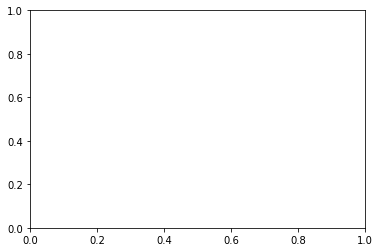

In [31]:
plt.scatter(obesity_info_no_Hawaii["Obesity Prevalence"], cancer_death_rate)

plt.xlabel("Obesity Prevalence")
plt.ylabel("Cancer Death Rate per 100,000")

x_axis= obesity_info_no_Hawaii["Obesity Prevalence"]
y_axis= cancer_death_rate
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

In [29]:
uninsured_rates = health_info["Uninsured Percentage (2016)"]
obesity_rates = obesity_info["Obesity Prevalence"]

The pearson correlation between both factors is 0.29


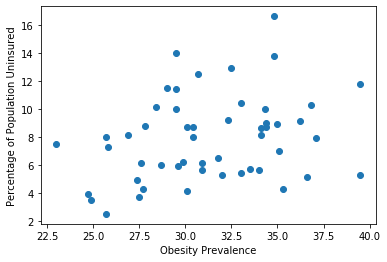

In [30]:
plt.scatter(obesity_rates, uninsured_rates)
plt.xlabel("Obesity Prevalence")
plt.ylabel("Percentage of Population Uninsured")
plt.show

x_axis= uninsured_rates
y_axis= obesity_rates
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

In [12]:
cancer_info

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Kentucky,521,26945,198,10206,38
1,Delaware,498,5803,170,1989,34
2,Pennsylvania,487,79060,169,28658,36
3,New Hampshire,484,8129,162,2718,33
4,New Jersey,483,50921,154,16407,32
5,New York,483,111527,151,35491,32
6,Louisiana,481,24888,183,9346,38
7,Rhode Island,478,6163,165,2223,36
8,West Virginia,476,11653,189,4756,41
9,Maine,476,8700,174,3267,38


ValueError: x and y must be the same size

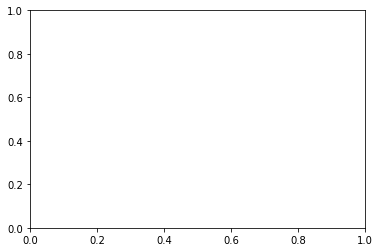

In [33]:
#drop Hawaii
list(uninsured_rates)

uninsured_rates_no_Hawaii = health_info[health_info["State"]!= "Hawaii"]
uninsured_rates_no_Hawaii

plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_rate)

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100,000")

x_axis= uninsured_rates_no_Hawaii['Uninsured Percentage (2016)']
y_axis= cancer_death_rate
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

The pearson correlation between both factors is 0.03


Text(0, 0.5, 'Cancer Incidence Rate per 100,000')

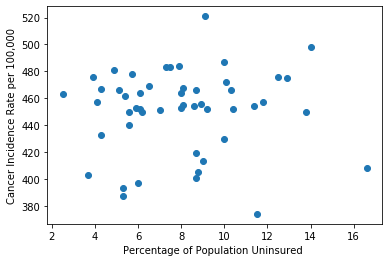

In [28]:
plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_incidence_rate)
correlation = st.pearsonr(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'],cancer_incidence_rate)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Incidence Rate per 100,000")

In [27]:
plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_per_hundred)
correlation = st.pearsonr(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_per_hundred)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100 Incidences")

NameError: name 'cancer_death_per_hundred' is not defined

In [16]:
#max and min values for health insurance

health_insurance_extremes = uninsured_rates_no_Hawaii.sort_values("Uninsured Percentage (2016)")
health_insurance_extremes.head(10)
health_insurance_extremes.tail(10)
health_insurance_extremes_final = pd.concat([health_insurance_extremes.head(10),health_insurance_extremes.tail(10)])
health_insurance_extremes_final

,State,Uninsured Percentage (2018),Uninsured Percentage (2016),Uninsured Percentage (2015),Uninsured Percentage (2014),Uninsured Percentage (2013)
21,Massachusetts,2.8,2.5,2.8,3.3,3.7
45,Vermont,4.0,3.7,3.8,5.0,7.2
8,District of Columbia,3.2,3.9,3.8,5.3,6.7
23,Minnesota,4.4,4.1,4.5,5.9,8.2
39,Rhode Island,4.1,4.3,5.7,7.4,11.6
15,Iowa,4.7,4.3,5.0,6.2,8.1
6,Connecticut,5.3,4.9,6.0,6.9,9.4
17,Kentucky,5.6,5.1,6.0,8.5,14.3
48,West Virginia,6.4,5.3,6.0,8.6,14.0
49,Wisconsin,5.5,5.3,5.7,7.3,9.1


In [17]:
joined_health_insurance_extremes = pd.merge(health_insurance_extremes_final, cancer_info, on="State")                                                                                        
joined_health_insurance_extremes 

,State,Uninsured Percentage (2018),Uninsured Percentage (2016),Uninsured Percentage (2015),Uninsured Percentage (2014),Uninsured Percentage (2013),Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Massachusetts,2.8,2.5,2.8,3.3,3.7,450,36149,156,12795,35
1,Vermont,4.0,3.7,3.8,5.0,7.2,453,3678,165,1355,37
2,District of Columbia,3.2,3.9,3.8,5.3,6.7,433,2818,169,1082,38
3,Minnesota,4.4,4.1,4.5,5.9,8.2,464,28996,153,9691,33
4,Rhode Island,4.1,4.3,5.7,7.4,11.6,478,6163,165,2223,36
5,Iowa,4.7,4.3,5.0,6.2,8.1,475,17806,166,6479,36
6,Connecticut,5.3,4.9,6.0,6.9,9.4,472,20843,146,6657,32
7,Kentucky,5.6,5.1,6.0,8.5,14.3,521,26945,198,10206,38
8,West Virginia,6.4,5.3,6.0,8.6,14.0,476,11653,189,4756,41
9,Wisconsin,5.5,5.3,5.7,7.3,9.1,467,32160,163,11398,35


The pearson correlation between both factors is 0.43


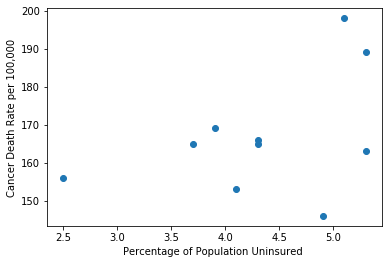

In [18]:
plt.scatter(health_insurance_extremes.head(10)["Uninsured Percentage (2016)"], joined_health_insurance_extremes.head(10)["Death Rate"])

x_axis= health_insurance_extremes.head(10)["Uninsured Percentage (2016)"]
y_axis= joined_health_insurance_extremes.head(10)["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100,000") 

print(f"The pearson correlation between both factors is {round(correlation[0],2)}")